In [1]:
from pyxlma.lmalib.io import read as lma_read
from pyxlma.plot.interactive import InteractiveLMAPlot
from pyxlma.lmalib.flash.cluster import cluster_flashes
from pyxlma.lmalib.flash.properties import flash_stats
import numpy as np
from os import listdir, path

In [2]:
%matplotlib widget

In [3]:
lma_paths = [path.join('lma', '0616', 'sa_fix', file) for file in sorted(listdir(path.join('lma', '0616', 'sa_fix')))]

lmad, file_start = lma_read.dataset(lma_paths)
lmad = flash_stats(cluster_flashes(lmad))
lmad

/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/pyxlma/coords.py:81: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  projectedData = array(proj4.transform(self.ERSlla, self.ERSxyz, lon, lat, alt ))


<xarray.Dataset>
Dimensions:                              (number_of_stations: 17,
                                          number_of_events: 3993458,
                                          number_of_flashes: 281419)
Coordinates:
  * number_of_flashes                    (number_of_flashes) uint64 0 ... 281418
Dimensions without coordinates: number_of_stations, number_of_events
Data variables: (12/42)
    network_center_latitude              float64 35.28
    network_center_longitude             float64 -97.92
    network_center_altitude              float64 417.9
    station_latitude                     (number_of_stations) float32 35.18 ....
    station_longitude                    (number_of_stations) float32 -97.44 ...
    station_altitude                     (number_of_stations) float32 346.0 ....
    ...                                   ...
    flash_event_count                    (number_of_flashes) uint32 38 1 ... 1 1
    event_parent_flash_id                (number_of_events) uint64 0 ... 281418
    event_x                              (number_of_events) float64 -9.063e+0...
    event_y                              (number_of_events) float64 2.801e+04...
    event_z                              (number_of_events) float32 4.509e+03...
    flash_id                             (number_of_flashes) uint64 0 ... 281418
Attributes:
    event_algorithm_version:   10.14.5R
    production_date:          2023-11-10 15:53:29 +00:00
    production_site:          Default
    history:                  LMA source file created  Tue Jun 20 18:57:17 20...
    source:                   VHF Lightning Mapping Array
    comment:                  
    event_algorithm_name:      ./lma_analysis -d 20230616 -t 013000 -s 600 -l...
    references:               
    flash_algorithm_version:  0.1
    flash_algorithm_name:     pyxlma DBSCAN
    institution:              unknown
    title:                    Lightning Mapping Array Dataset, L1b events and...

In [4]:
lonmask = (lmad.flash_init_longitude.data > -97.6 - 0.25) & (lmad.flash_init_longitude.data < -97.6 + 0.25)
latmask = (lmad.flash_init_latitude.data > 35.29 - 0.25) & (lmad.flash_init_latitude.data < 35.29 + 0.25)
areamask = lmad.flash_area.data > 100

totalmask = lonmask & latmask & areamask


lmad_c_s = lmad.isel(number_of_flashes=totalmask)
evt_mask = np.isin(lmad.event_parent_flash_id.data, )

/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '


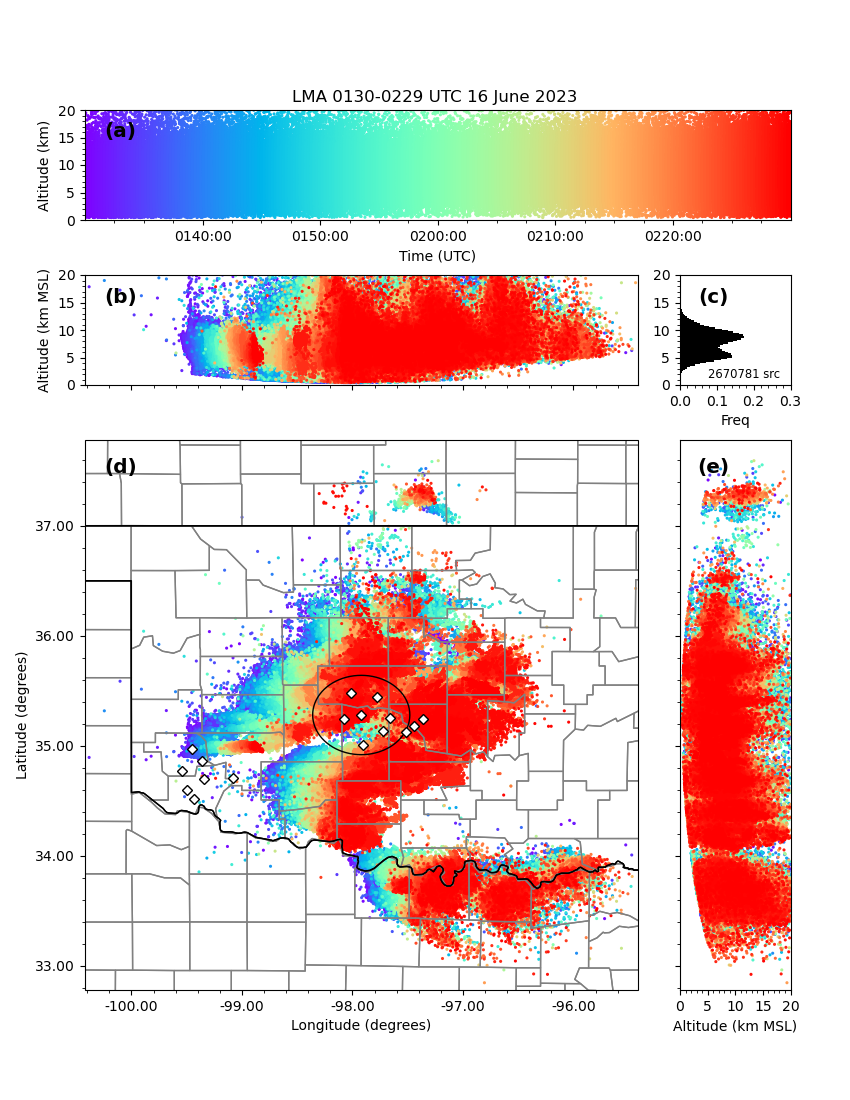

/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '


In [5]:
full_interact = InteractiveLMAPlot(lmad_c_s, clon=-97.92, clat=35.28, xlim=[-97.92-2.5, 2.5-97.92], ylim=[35.28-2.5, 35.28+2.5], zlim=[0, 20], plot_cmap='rainbow')

In [28]:
print(full_interact.bounds['t'][0].strftime('%Y-%m-%d %H:%M:%S.%f'))
print(full_interact.bounds['t'][1].strftime('%Y-%m-%d %H:%M:%S.%f'))

2023-06-16 01:34:53.910994
2023-06-16 01:34:55.028241


In [24]:
file_start = (lmad.event_time.data.astype(float)[0]//1e6)*1e6

filter_start = file_start + 2.943e11
filter_end = file_start + 2.947e11

filter_start = np.array([filter_start]).astype('datetime64[ns]')[0]
filter_end = np.array([filter_end]).astype('datetime64[ns]')[0]

print(filter_start)
print(filter_end)

flash_mask = (lmad.flash_time_start.data < filter_end) & (lmad.flash_time_end.data > filter_start)

lmad_filt_flashes = lmad.isel(number_of_flashes=flash_mask)
src_mask = np.isin(lmad_filt_flashes.event_parent_flash_id.data, lmad_filt_flashes.flash_id.data)
lmad_filt_flashes = lmad_filt_flashes.isel(number_of_events=src_mask)

print(lmad_filt_flashes.flash_event_count.data)
print(lmad_filt_flashes.flash_time_start.data)

lmad_filt_flashes

2023-06-16T01:34:54.300000000
2023-06-16T01:34:54.700000000
[356 227  15   4 728   2   1   1   1   1   1   1   1   2   1   1   1   1
   1   2   1   1   1   1   4   1   1   4   1   7   1   1   1   1   2   1
   1   1   1   1   2  21   1   1   8   2  47   2   1   2   1   1   1   3
   1   1   1   2   1   1]
['2023-06-16T01:34:53.966855279' '2023-06-16T01:34:54.103733444'
 '2023-06-16T01:34:54.163523812' '2023-06-16T01:34:54.269731278'
 '2023-06-16T01:34:54.302547605' '2023-06-16T01:34:54.312189999'
 '2023-06-16T01:34:54.316531112' '2023-06-16T01:34:54.331538592'
 '2023-06-16T01:34:54.331947195' '2023-06-16T01:34:54.333887690'
 '2023-06-16T01:34:54.341941305' '2023-06-16T01:34:54.350722809'
 '2023-06-16T01:34:54.356171285' '2023-06-16T01:34:54.364198215'
 '2023-06-16T01:34:54.373966393' '2023-06-16T01:34:54.374267322'
 '2023-06-16T01:34:54.383281908' '2023-06-16T01:34:54.388020008'
 '2023-06-16T01:34:54.390840226' '2023-06-16T01:34:54.392577032'
 '2023-06-16T01:34:54.395397666' '2023-06-16T

<xarray.Dataset>
Dimensions:                              (number_of_stations: 17,
                                          number_of_events: 1481,
                                          number_of_flashes: 60)
Coordinates:
  * number_of_flashes                    (number_of_flashes) uint64 28397 ......
Dimensions without coordinates: number_of_stations, number_of_events
Data variables: (12/42)
    network_center_latitude              float64 35.28
    network_center_longitude             float64 -97.92
    network_center_altitude              float64 417.9
    station_latitude                     (number_of_stations) float32 35.18 ....
    station_longitude                    (number_of_stations) float32 -97.44 ...
    station_altitude                     (number_of_stations) float32 346.0 ....
    ...                                   ...
    flash_event_count                    (number_of_flashes) uint32 356 ... 1
    event_parent_flash_id                (number_of_events) uint64 28397 ... ...
    event_x                              (number_of_events) float64 6.246e+03...
    event_y                              (number_of_events) float64 -4.578e+0...
    event_z                              (number_of_events) float32 1.094e+04...
    flash_id                             (number_of_flashes) uint64 28397 ......
Attributes:
    production_date:          2023-11-10 08:26:16 +00:00
    production_site:          Default
    institution:              unknown
    references:               
    comment:                  
    history:                  LMA source file created  Tue Jun 20 18:57:17 2023
    event_algorithm_name:      ./lma_analysis -d 20230616 -t 013000 -s 600 -l...
    title:                    Lightning Mapping Array Dataset, L1b events and...
    source:                   VHF Lightning Mapping Array
    flash_algorithm_name:     pyxlma DBSCAN
    event_algorithm_version:   10.14.5R
    flash_algorithm_version:  0.1

/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '


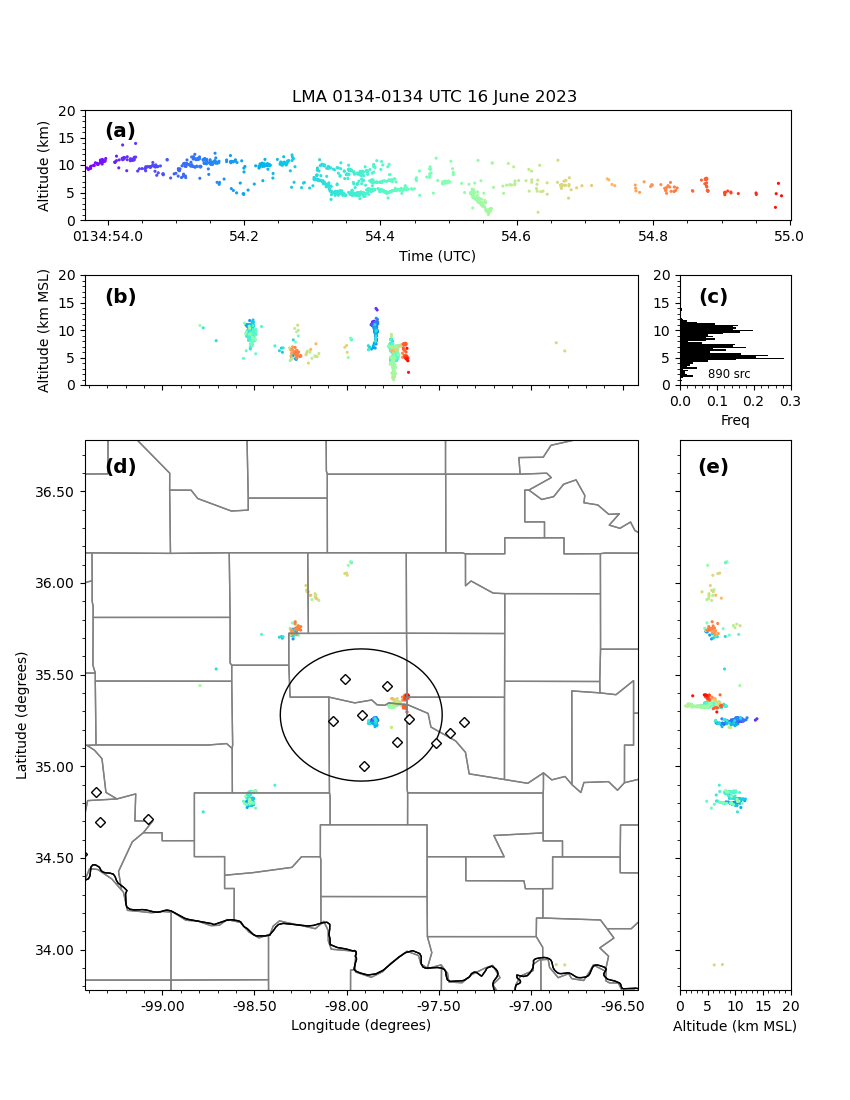

/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warning

In [25]:
interact_filt = InteractiveLMAPlot(lmad_filt_flashes, clon=-97.92, clat=35.28, xlim=[-97.92-1.5, 1.5-97.92], ylim=[35.28-1.5, 35.28+1.5], zlim=[0, 20], plot_cmap='rainbow')

In [26]:
lmad_flash_case = lmad_filt_flashes.isel(number_of_flashes=4)

src_case_mask = np.isin(lmad_flash_case.event_parent_flash_id.data, lmad_flash_case.flash_id.data)
lmad_flash_case = lmad_flash_case.isel(number_of_events=src_case_mask)

print(lmad_flash_case.flash_time_start.data)
print(lmad_flash_case.flash_time_end.data)
print(lmad_flash_case.flash_event_count.data)
print(lmad_flash_case.flash_id.data)

2023-06-16T01:34:54.302547605
2023-06-16T01:34:55.001056540
728
28439


/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '


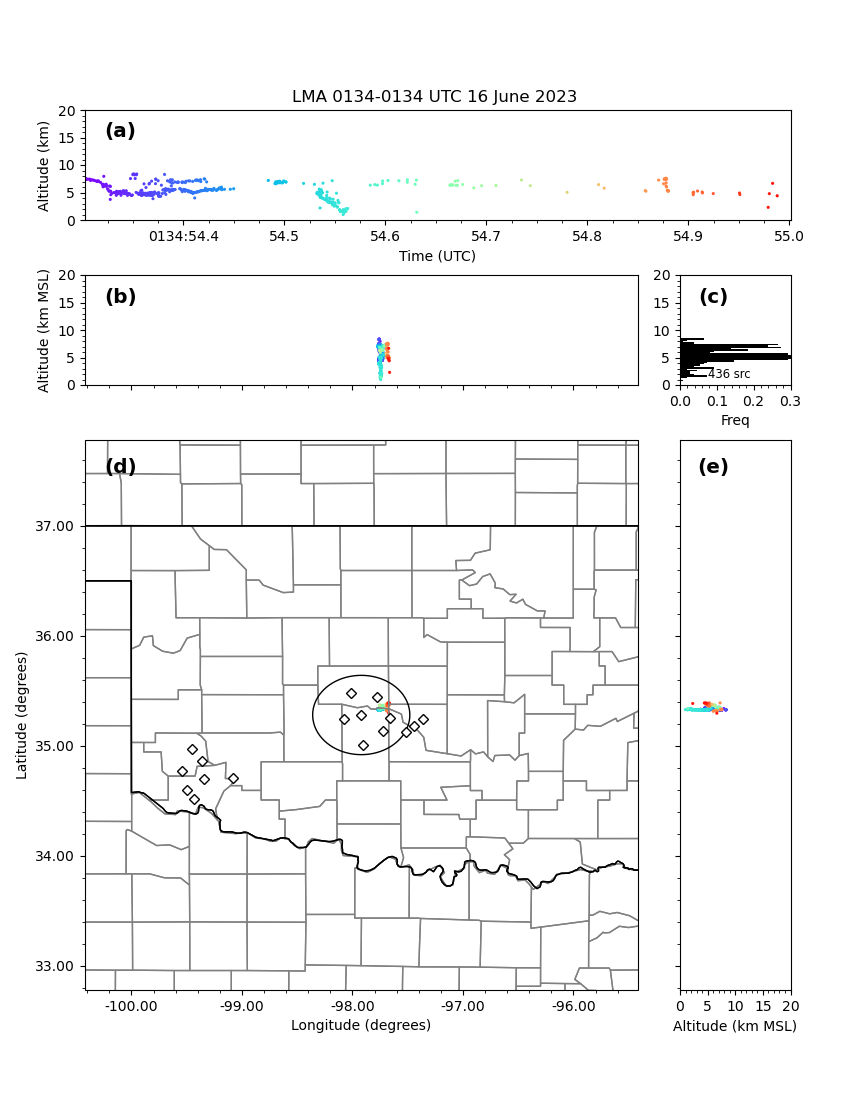

/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warning

In [27]:
interact_case = InteractiveLMAPlot(lmad_flash_case, clon=-97.92, clat=35.28, xlim=[-97.92-2.5, 2.5-97.92], ylim=[35.28-2.5, 35.28+2.5], zlim=[0, 20], plot_cmap='rainbow')

In [8]:
lmad_flash_case

<xarray.Dataset>
Dimensions:                              (number_of_stations: 17,
                                          number_of_events: 3244)
Coordinates:
    number_of_flashes                    uint64 22059
Dimensions without coordinates: number_of_stations, number_of_events
Data variables: (12/42)
    network_center_latitude              float64 35.28
    network_center_longitude             float64 -97.92
    network_center_altitude              float64 417.9
    station_latitude                     (number_of_stations) float32 35.18 ....
    station_longitude                    (number_of_stations) float32 -97.44 ...
    station_altitude                     (number_of_stations) float32 346.0 ....
    ...                                   ...
    flash_event_count                    uint32 3244
    event_parent_flash_id                (number_of_events) uint64 22059 ... ...
    event_x                              (number_of_events) float64 1.595e+04...
    event_y                              (number_of_events) float64 2.616e+04...
    event_z                              (number_of_events) float32 8.429e+03...
    flash_id                             uint64 22059
Attributes:
    production_site:          Default
    source:                   VHF Lightning Mapping Array
    flash_algorithm_name:     pyxlma DBSCAN
    event_algorithm_name:      ./lma_analysis -d 20230616 -t 010000 -s 600 -l...
    comment:                  
    event_algorithm_version:   10.14.5R
    production_date:          2023-11-10 06:04:13 +00:00
    references:               
    institution:              unknown
    history:                  LMA source file created  Tue Jun 20 18:05:46 2023
    flash_algorithm_version:  0.1
    title:                    Lightning Mapping Array Dataset, L1b events and...

In [124]:
from matplotlib import pyplot as plt
plt.close('all')

| Case | Flash ID | lat/lon delta | time start delta | time end delta |
|---|---|---|---|---|
| 0 | 12650 | 0.5 | 0 | 0 |
| 1 | 13367 | 0.2 | -0.14 | .006 |
| 2 | 14134 | 0.2 | 0 | 0 |
| 3 | 22059 | 0.25 | -0.015 | .25 |
| 4 | 36458 (36468) | 0.5 | -0.02 | 0.55 |
| 5 | 41141 | 0.25 | -0.025 | .31 |

| Case | Flash ID | lat/lon delta | time start delta | time end delta |
|---|---|---|---|---|
| 0 | 18439 | 0.25 | -0.15 | 0 |
| 1 | 28439 | 0.25 | -0.4 | 0 |

In [153]:
cases = [
    {
        'flid' : 12650,
        'deltalat' : 0.5,
        'deltalon' : 0.5,
        'start_offset' : 0,
        'end_offset' : 0
    }, {
        'flid' : 13367,
        'deltalat' : 0.2,
        'deltalon' : 0.2,
        'start_offset' : -0.14e9,
        'end_offset' : 0.006e9
    }, {
        'flid' : 14134,
        'deltalat' : 0.2,
        'deltalon' : 0.2,
        'start_offset' : 0,
        'end_offset' : 0
    }, {
        'flid' : 22059,
        'deltalat' : 0.25,
        'deltalon' : 0.25,
        'start_offset' : -0.015e9,
        'end_offset' : 0.25e9
    }, {
        'flid' : 36458,
        'deltalat' : 0.5,
        'deltalon' : 0.5,
        'start_offset' : -0.02e9,
        'end_offset' : 0.55e9
    }, {
        'flid' : 41141,
        'deltalat' : 0.25,
        'deltalon' : 0.25,
        'start_offset' : -0.025e9,
        'end_offset' : 0.31e9
    }
]

In [19]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from pyxlma.coords import RadarCoordinateSystem, GeographicSystem, TangentPlaneCartesianSystem
import pyart



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [40]:
rdr_test = xr.open_dataset('rax/RAXPOL-20230616-010316-E17.5-D.nc')
rax_elevation_m = 380

In [41]:




rcs = RadarCoordinateSystem(rdr_test.Latitude, rdr_test.Longitude, rax_elevation_m)
geosys = GeographicSystem()
print(f'Lightning flash init lon: {lmad_flash_case.flash_init_longitude.data}°')
print(f'Lightning flash init lat: {lmad_flash_case.flash_init_latitude.data}°')
print(f'Lightning flash init alt: {lmad_flash_case.flash_init_altitude.data} km')
X, Y, Z = geosys.toECEF(lmad_flash_case.flash_init_longitude, lmad_flash_case.flash_init_latitude, lmad_flash_case.flash_init_altitude)
targetr, targetaz, targetel = rcs.fromECEF(X, Y, Z)

Lightning flash init lon: -97.74231719970703°
Lightning flash init lat: 35.51413345336914°
Lightning flash init alt: 8428.599609375 km


/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/pyxlma/coords.py:254: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  self.Requator, foo1, foo2 = proj4.transform(self.lla,self.xyz,0,0,0) # Equatorial radius  - WGS-84 value = 6378137.0
/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/pyxlma/coords.py:255: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  foo1, foo2, self.Rpolar = proj4.transform(self.lla,self.xyz,0,90,0) # Polar radius  - WGS-84 value = 6356752.314
/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/pyxlma/coords.py:81: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  projectedData = array(proj4.transform(self.ERSlla, self.ERSxyz, lon, lat, a

In [42]:
print(f'Range to case 3 init: {targetr[0]:.1f} m')
print(f'Azimuth to case 3 init: {targetaz[0]:.1f}°')
print(f'Elevation to case 3 init: {targetel[0]:.1f}°')

Range to case 3 init: 27385.6 m
Azimuth to case 3 init: 21.3°
Elevation to case 3 init: 17.0°


In [37]:
rng = np.matmul(rdr_test.Gate.data.reshape(-1, 1), rdr_test.GateWidth.data.reshape(1, -1))
az = np.tile(rdr_test.Azimuth.data, (rng.shape[0], 1))
eldat = np.tile(rdr_test.Elevation.data, (rng.shape[0], 1))
rcs = RadarCoordinateSystem(rdr_test.Latitude, rdr_test.Longitude, rax_elevation_m)
lon, lat, alt = rcs.toLonLatAlt(rng, az, eldat)
lon = np.array(lon).reshape(az.shape)
lat = np.array(lat).reshape(az.shape)
alt = np.array(alt).reshape(az.shape)

/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/pyxlma/coords.py:254: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  self.Requator, foo1, foo2 = proj4.transform(self.lla,self.xyz,0,0,0) # Equatorial radius  - WGS-84 value = 6378137.0
/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/pyxlma/coords.py:255: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  foo1, foo2, self.Rpolar = proj4.transform(self.lla,self.xyz,0,90,0) # Polar radius  - WGS-84 value = 6356752.314


/var/folders/sp/1j_lh9313dg42jrzhsfb4mk40000gn/T/ipykernel_56519/2528440729.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  handle = ax.pcolormesh(az[:, 290-width:291+2*width], alt[:, 290-width:291+2*width], rdr_test.Differential_Reflectivity.data.T[:, 290-width:291+2*width], vmin=-2, )


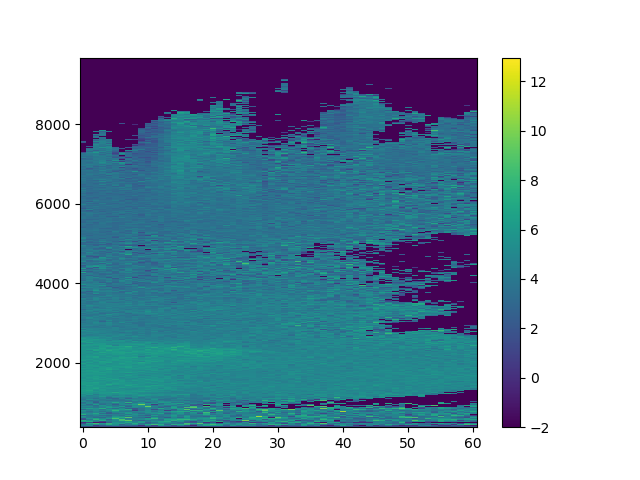

In [67]:
fig = plt.figure()
ax = fig.gca()
width = 20
handle = ax.pcolormesh(az[:, 290-width:291+2*width], alt[:, 290-width:291+2*width], rdr_test.Differential_Reflectivity.data.T[:, 290-width:291+2*width], vmin=-2, )
fig.colorbar(handle, ax=ax)

In [73]:
np.argmin(np.abs(rdr_test.Azimuth.data - 21.3))

290

In [75]:
rdr_test.Elevation.data[290]

16.478558

In [3]:
px1ktest = xr.open_dataset('px1k/PX-20230616-010310-A350.0-Z.nc')

/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'gini' loading failed:
Struct() takes at most 1 argument (3 given)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
<frozen importlib._bootstrap>:488: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [15]:
px_alt_m = 318
rcs = RadarCoordinateSystem(px1ktest.Latitude, px1ktest.Longitude, px_alt_m)
tpcs = TangentPlaneCartesianSystem(px1ktest.Latitude, px1ktest.Longitude, px_alt_m)
geosys = GeographicSystem()

ecef_X, ecef_Y, ecef_Z = rcs.toECEF(rng, az, eldat)

tpcs_x, tpcs_y, tpcs_z = tpcs.fromECEF(ecef_X, ecef_Y, ecef_Z)

tpcs_x = tpcs_x.reshape(rng.shape)
tpcs_y = tpcs_y.reshape(rng.shape)
tpcs_z = tpcs_z.reshape(rng.shape)

/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/pyxlma/coords.py:254: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  self.Requator, foo1, foo2 = proj4.transform(self.lla,self.xyz,0,0,0) # Equatorial radius  - WGS-84 value = 6378137.0
/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/pyxlma/coords.py:255: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  foo1, foo2, self.Rpolar = proj4.transform(self.lla,self.xyz,0,90,0) # Polar radius  - WGS-84 value = 6356752.314
/Users/stgardner4/micromamba/envs/raxpol/lib/python3.12/site-packages/pyxlma/coords.py:375: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  self.centerECEF = array(proj4.transform(ERSlla, ERSxyz, ctrLon, ctrLat, ct

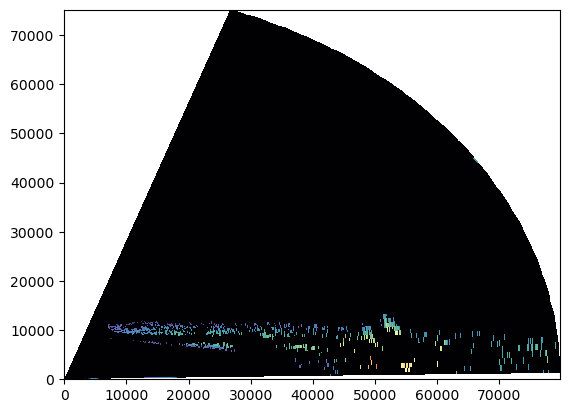

In [21]:
fig = plt.figure()
ax = fig.gca()
ax.pcolormesh(ground_range, tpcs_z, px1ktest.Intensity.data.T, vmin=-10, vmax=80, cmap='pyart_ChaseSpectral')

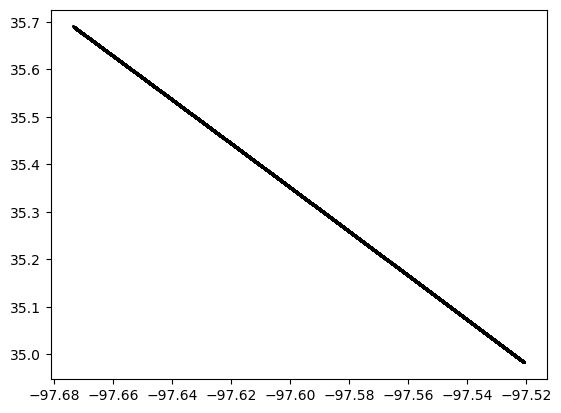

In [22]:
fig2 = plt.figure()
ax2 = fig2.gca()

lon, lat, alt = rcs.toLonLatAlt(rng, az, eldat)

ax2.scatter(lon, lat, 1, 'k')